### The Boston Housing Price Prediction


In [1]:
import pandas as pd


In [2]:
housing_data = pd.read_csv('data.csv')

In [3]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#checking missing data
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
#importing matplotlib library for graphical representation
import matplotlib.pyplot as plt

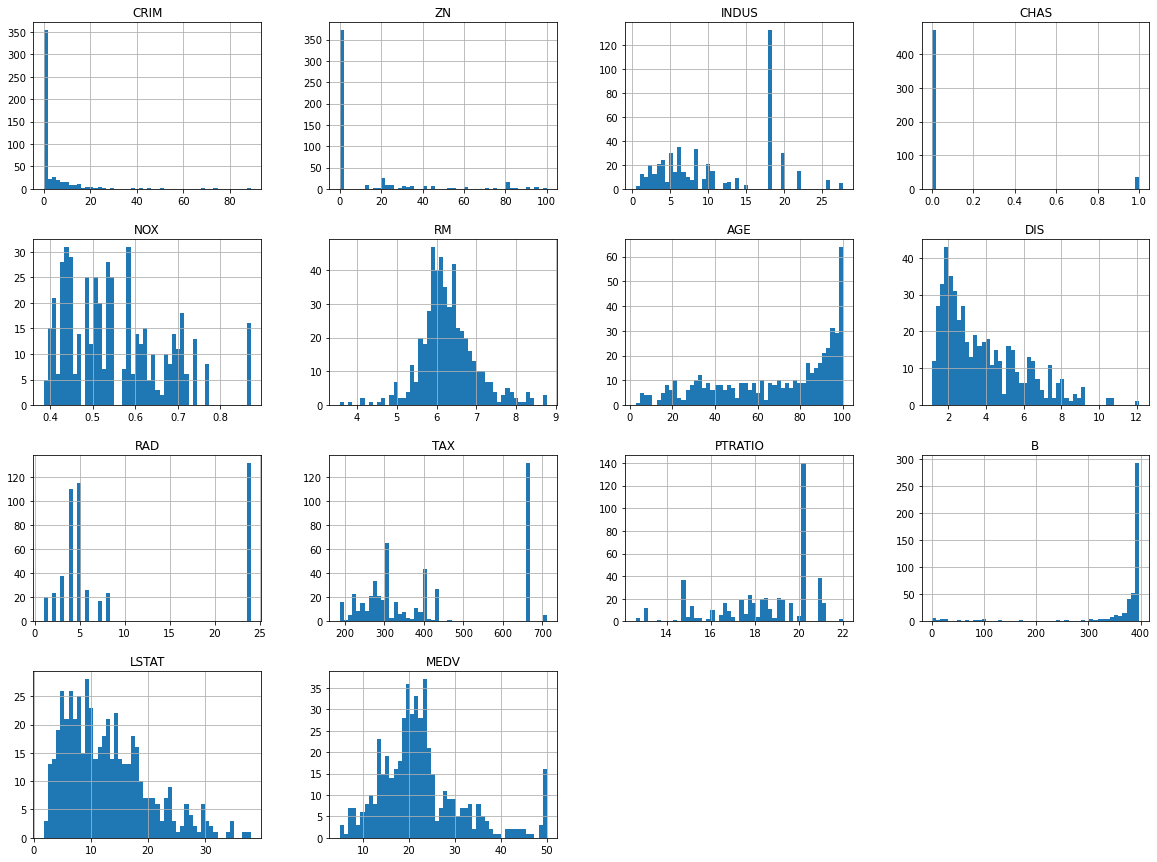

In [7]:
housing_data.hist(bins=50, figsize=(20,15))
plt.show()

#### Splitting the Training & Testing Data

In [8]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42) 
    '''
     fixing the limitations of random package because different time it will use different data and it can overfit the
     model by matching all the data. 
    '''
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[0:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(housing_data, 0.2)

In [10]:
print("Rows in train set :", len(train_set))
print("Rows in test set :", len(test_set))

Rows in train set : 405
Rows in test set : 101


#### We can do same thing by using sklearn library

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)
print("Rows in train set :", len(train_set))
print("Rows in test set :", len(test_set))

Rows in train set : 404
Rows in test set : 102


In [12]:
housing_data['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

##### What the machine learning model can do here is that it can take only one type of value in the train set and ignore the other type of value. So to avoid this thing we'll do the stratified shuffle here by using sklearn library.

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data['CHAS']):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

#### Now here we will find co relation between data like how the factors act

In [16]:
corr_data = housing_data.corr()

In [17]:
corr_data['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

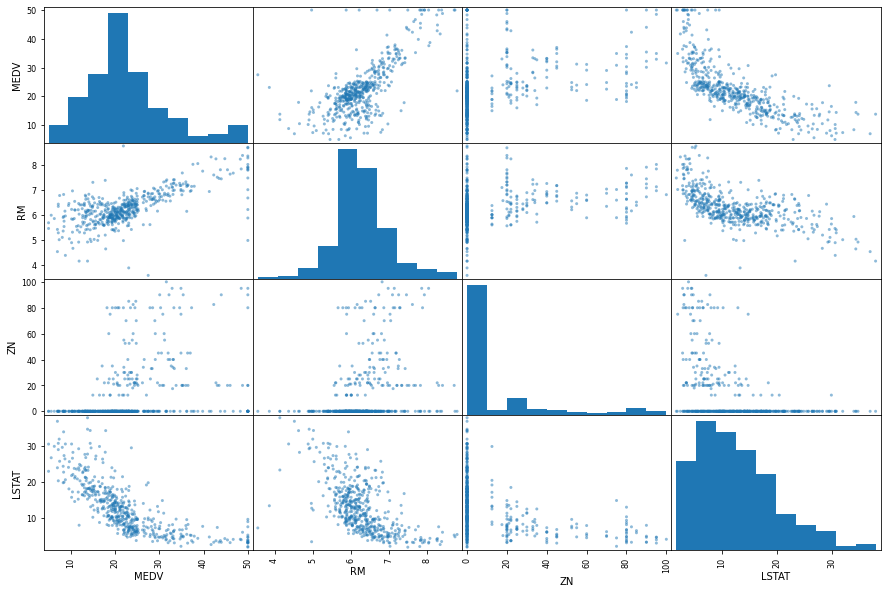

In [18]:
#plotting the graphs by taking some attributes from data
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing_data[attributes], figsize = (15,10))

### Model Training

In [19]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [20]:
from xgboost import XGBRegressor
#We are using regressor model here because it's an Regression problem not classification.

In [21]:
Y = housing_data['MEDV']

In [22]:
Y_train, Y_test = train_test_split(Y, test_size = 0.2, random_state = 42)

In [23]:
print(Y_train.shape, Y_test.shape)

(404,) (102,)


In [24]:
#loading the model
model = XGBRegressor()

In [25]:
#training the model with train_set
model.fit(train_set, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

#### Evaluation
#### Prediction on training data

In [26]:
training_data_prediction = model.predict(train_set)

In [27]:
print(training_data_prediction)

[11.998503  19.899378  19.39947   13.4003935 18.199585  24.599867
 21.096508  24.701645   8.700759  27.500246  20.699825  36.2007
 31.601135  11.701657  39.800514  13.901352  21.799194  23.705343
 17.599762  24.399809   8.800032  19.197176  25.29937   20.40286
 23.099726  37.89769   15.600096  45.401005  15.69866   22.599522
 14.499474  18.700287  17.799723  16.099596  20.60038   31.599892
 29.097942  15.601144  17.504498  22.500046  19.400866  19.300348
  8.499625  20.599318  16.997665  17.092894  14.500686  49.999138
 14.296592  12.598381  28.701391  21.20083   19.2997    23.100237
 19.098532  25.001253  33.399635   5.0008526 29.597212  18.697163
 21.700136  23.097372  22.79945   20.998732  48.800068  14.603935
 16.596823  27.099327  20.101599  19.800926  20.99961   41.301483
 23.199348  20.400541  18.501316  29.399128  36.40106   24.395308
 11.800608  13.79897   12.298895  17.800425  33.09993   26.697687
 13.402016  14.400125  50.0007    22.001108  19.904215  23.799564
 17.49955   1

In [28]:
from sklearn import metrics

In [29]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

In [30]:
# Meam Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

In [31]:
print("R squared error : ", score_1)
print("Mean absolute error :", score_2)

R squared error :  0.9999999641840911
Mean absolute error : 0.001249183522592879


#### Prediction on Testing data

In [32]:
# Accuracy for prediction on test dara
test_data_prediction = model.predict(test_set)

In [33]:
# R squared error
score_3 = metrics.r2_score(Y_test, test_data_prediction)

# Meam Absolute Error
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [34]:
print("R squared error : ", score_3)
print("Mean absolute error :", score_4)

R squared error :  0.9992268300709688
Mean absolute error : 0.1599205774419451


### Visualizing the actual prices and predicted prices

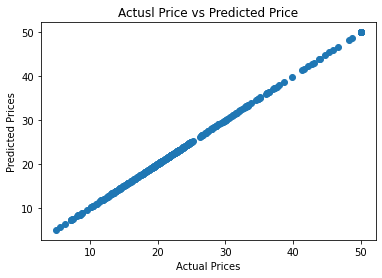

In [35]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actusl Price vs Predicted Price")
plt.show()